In [1]:
%matplotlib inline
from brian2 import *

## Synapses

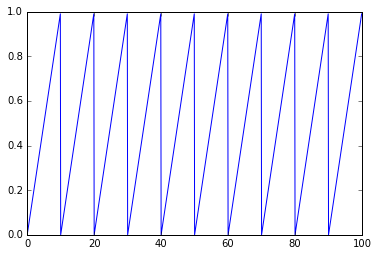

In [2]:
# Regular spiking cells (will be useful as stimulation for other neurons later)
start_scope()
# The variable x will go from 0 to 100 in a second, or 100 times from 0 to 1,
# with a threshold of 1 and a reset to 0 -- so this can be used as a generator
# of regular spiking activity
eqs = 'dx/dt = 100*Hz : 1'
input_group = NeuronGroup(10, eqs, threshold='x>1', reset='x=0')

input_mon = StateMonitor(input_group, 'x', record=True)
run(100*ms)
plot(input_mon.t/ms, input_mon.x[0])

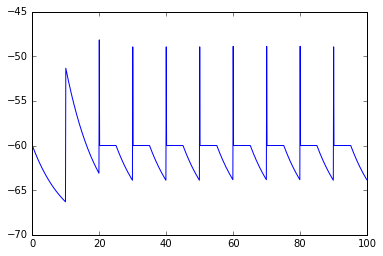

In [3]:
start_scope()
eqs = 'dx/dt = 100*Hz : 1'
input_group = NeuronGroup(10, eqs, threshold='x>1', reset='x=0')

input_mon = StateMonitor(input_group, 'x', record=True)

tau = 10*ms   # time constant
R = 50*Mohm   # membrane resistance
E_L = -70*mV  # leak reversal potential

eqs = '''
# No more injected current
dV_m/dt = (E_L - V_m)/tau : volt (unless refractory)
'''

neurons = NeuronGroup(10, eqs, threshold='V_m>-50*mV',
                     reset='V_m=-60*mV',
                     refractory=5*ms)
neurons.V_m = -60*mV

# This creates a new Synapses object for connections from the input group
# to the neurons. Spikes from the pre-synaptic group (i.e. input_group) will
# trigger an increase of the variable V_m in the post-synaptic group. 
connections = Synapses(input_group, neurons, pre='V_m_post += 1.5*mV')
# The above line did not actually create any connections between the two
# groups -- there are many ways to connect them (all-to-all, one-to-one,
# randomly, ...), therefore they have to be connected explicitly
# The connect function specifies a condition that has to be fulfilled for a
# pair of neurons to be connected. Specifying `True` means that all possible
# pairs should be connected
connections.connect(True)
# connections.connect('i == j') would connect in a one-to-one pattern
# ("connect each pair (i, j) where i=j")

mon = StateMonitor(neurons, 'V_m', record=True)

run(100*ms)
plot(mon.t/ms, mon.V_m[0]/mV)

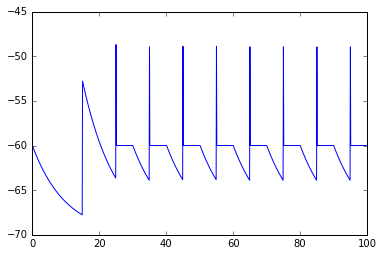

In [4]:
start_scope()
eqs = 'dx/dt = 100*Hz : 1'
input_group = NeuronGroup(10, eqs, threshold='x>1', reset='x=0')

input_mon = StateMonitor(input_group, 'x', record=True)

tau = 10*ms   # time constant
R = 50*Mohm   # membrane resistance
E_L = -70*mV  # leak reversal potential

eqs = '''
dV_m/dt = (E_L - V_m)/tau : volt (unless refractory)
'''

neurons = NeuronGroup(10, eqs, threshold='V_m>-50*mV',
                     reset='V_m=-60*mV',
                     refractory=5*ms)
neurons.V_m = -60*mV

connections = Synapses(input_group, neurons, pre='V_m_post += 1.5*mV')
connections.connect(True)
# Delays can be specified for all synapses (as below), or for each synapse
# individually
connections.delay = 5*ms

mon = StateMonitor(neurons, 'V_m', record=True)

run(100*ms)
# The input now arives 5ms later:
plot(mon.t/ms, mon.V_m[0]/mV)

### [Exercise: Variable delays]

* What happens if the delay is not the same for all connections? Is the stimulation as effective?
* Is there another way to get the same effect for fixed delays (and keeping the constant firing rate across input neurons)?

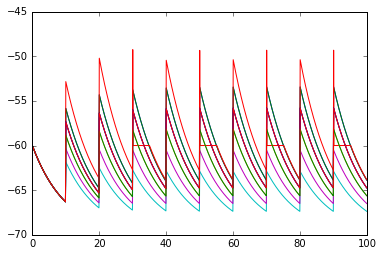

In [5]:
# Connection patterns
# Regular spiking cells
start_scope()
eqs = '''
dx/dt = rates : 1
rates : Hz
'''
input_group = NeuronGroup(10, eqs, threshold='x>1', reset='x=0')
input_group.rates = 100*Hz

input_mon = StateMonitor(input_group, 'x', record=True)

tau = 10*ms   # time constant
R = 50*Mohm   # membrane resistance
E_L = -70*mV  # leak reversal potential

eqs = '''
dV_m/dt = (E_L - V_m )/tau : volt (unless refractory)
'''

neurons = NeuronGroup(10, eqs, threshold='V_m>-50*mV',
                     reset='V_m=-60*mV',
                     refractory=5*ms)
neurons.V_m = -60*mV

connections = Synapses(input_group, neurons, pre='V_m_post += 1.5*mV')
# Connect cell pairs with a 50% probability
connections.connect(True, p=0.5)

mon = StateMonitor(neurons, 'V_m', record=True)

run(100*ms)
# mon.V_m has the neuron index as the first dimension (that's why you
# can select a single neuron with mon.V_m[idx]), but for plotting over
# the time the first dimension has to be the time. using ".T" transposes
# the matrix so that all neurons can be plotted at the same time easily
_ = plot(mon.t/ms, mon.V_m.T/mV)
# The _ = ... above hides some ugly [<matplotlib.lines.Line2D...] output